# What are the most Demanded Skills for the Top 3 most Popular Data roles?

## Methodology:

1- Clean-up Skill column 
2- Calculate Skill count based on 'Job_title_short'
3- Calculate Slill percentage
4- Plot final findings

In [61]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# merge dataframes 

In [62]:
df_US = df[df['job_country'] == 'United States']

In [63]:
df_skills = df_US.explode('job_skills') # explode the job_skills column so that each skill is in a separate row


In [64]:
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [65]:
df_skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = df_skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by = 'skill_count', ascending = False, inplace = True)
df_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [66]:
job_titles = df_skill_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

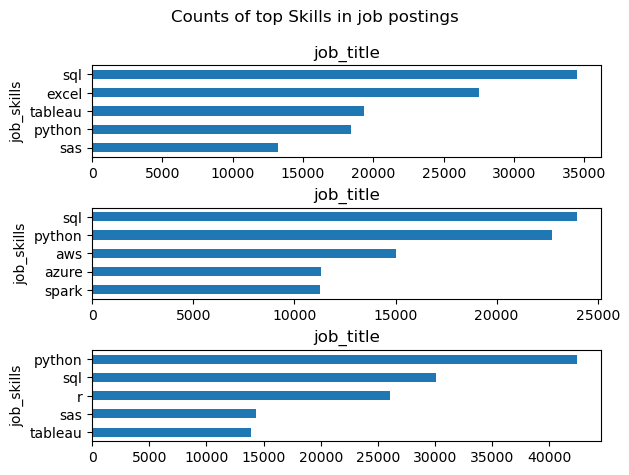

In [67]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title='job_title')
    ax[i].invert_yaxis()
    ax[i].set_ylabel = ('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of top Skills in job postings')
fig.tight_layout(h_pad=0.5) # h_pad is the height padding between subplots
plt.show()


In [68]:
# the percentage 
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name = 'jobs_total')

In [69]:
df_skills_perc = df_skill_count.merge(df_job_title_count, how = 'left', on = 'job_title_short')

df_skills_perc['skill_percent'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


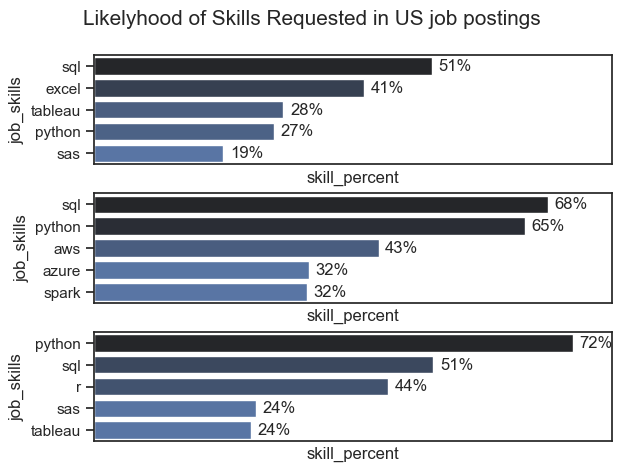

In [85]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style = 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title='job_title')
    sns.barplot(data = df_plot, x = 'skill_percent', y = 'job_skills', ax = ax[i], hue = 'skill_count', palette = 'dark:b_r')
    ax[i].set_ylabel = ('')
    ax[i].set_xlabel = ('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skill_percent']):  # to show the percentage beside bars
        ax[i].text(v +1 ,n, f'{v:.0f}%', va = 'center') #text(v, n, v) means that

    if i != len('job_title') - 1: 
        ax[i].set_xticks([])

fig.suptitle('Likelyhood of Skills Requested in US job postings', fontsize = 15)
fig.tight_layout(h_pad=0.5) # h_pad is the height padding between subplots and that fix the overlap
plt.show()